# **MNIST Handwritten Digit Classification using a CNN**

## **Introduction**

## **Introduction to the MNIST Dataset**

The **MNIST** dataset is an acronym that stands for the **Modified National Institute of Standards and Technology** dataset.

*   **This dataset consists of 60,000 grayscale images**, which are small 28x28 pixel images. 
<br> **These are images of handwritten digits from 0 to 9.**
*   **The task is to correctly classify the image of a handwritten digit into the right number**, that is - one of the 10 numbers from 0 to 9.





## **Importing the Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import random
np.random.seed(1) #for numpy
random.seed(1) 
tf.random.set_seed(1) #for tensorflow




## **Loading the Dataset**

*   The MNIST dataset is already present in TensorFlow and Keras, in the form of an **N-dimensional Numpy array**, so we can directly import the dataset from the package and use it.
*   The dataset can be imported as shown below: <br>
`from tensorflow.keras.datasets import mnist`<br>
`mnist.load_data()`
*   **mnist.load_data()** returns both the train and test data. The train data consists of 60,000 images in the form of Numpy arrays, while the test data consists of 10,000 images as Numpy arrays.





In [ ]:
# Loading the data
from tensorflow.keras.datasets import fashion_mnist

#tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

Here the data is stored in a **3-dimensional Numpy array**. 
- The first dimension **60000** denotes **the number of images in the training data**, and each image is stacked on top of the other, making it a 3-dimensional Numpy array.
- The second and third dimensions **28, 28** denote the number of pixels along the height and width of the 2-dimensional image.

Below is a 2-dimensional Numpy representation (the pixelmap) of the first image in the training data. Each image is represented by 28x28 square pixel values.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

The **target labels** are numerical digits between 0 to 9. 

In [ ]:
X_test.shape

(10000, 28, 28)

The test dataset, on the other hand, has **10,000 images**. Each image, as before, is a 28x28 square image.

## **Data Visualization**

### **Converting the Numpy arrays to images and visualizing a few random images**

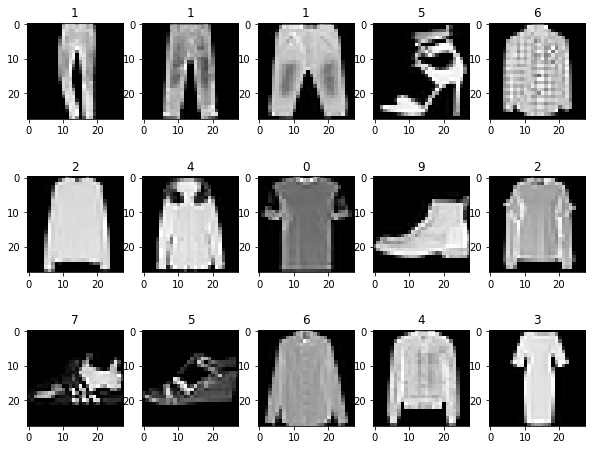

In [ ]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 5                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

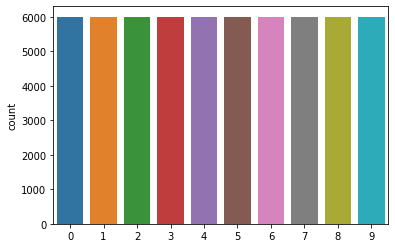

In [ ]:
# Plot distribution of each category 
count_plot = sns.countplot(y_train)

We observe that **the dataset appears to be quite balanced**, with each category having approximately the same number of images. 

So **accuracy should be a good evaluation metric** for the model performance in this case study.

## **Data Preparation**

In the data preparation stage, **we generally reshape the dataset to have a single channel** and **we also normalize the feature inputs.**

Normalization is highly recommended as it has the following benefits when training a neural network model:

1. **Normalization makes the training faster and reduces the chances of getting stuck at a local optima.**
3. **Weight decay and estimation can be done more conveniently** with normalized inputs.
4. In deep neural networks, **normalization helps to avoid the Vanishing/Exploding gradient problem** The Vanishing/Exploding gradient problem occurs when very small or very large error gradients accumulate, and that results in either extremely small or very large updates to neural network model weights during the training process. This makes a model unstable and unable to learn from the training data.

As we already know, the images are in grayscale, so let us **reshape the arrays to just have a single channel**.

In [ ]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Since this is a **10-class classification problem**, **the output layer should have 10 neurons** which will provide us with the probabilities of the input image belonging to each of those 10 classes. Therefore, we also need to create a **one-hot encoded representation for the target classes.**

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
y_test_encoded.shape

(10000, 10)

## **Model Building - Artificial Neural Network (ANN)**

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1), padding = 'same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))
#cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))
cnn_model.add(BatchNormalization())
#cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
#cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(16, activation='relu'))
#cnn_model.add(Dropout(0.25))
#cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                        

In [ ]:
model_history = cnn_model.fit(X_train_normalized,y_train_encoded, 
                              validation_split=0.2, epochs=5, verbose=2)
                        

Epoch 1/5
1500/1500 - 6s - loss: 0.1300 - accuracy: 0.7419 - val_loss: 0.0635 - val_accuracy: 0.8754 - 6s/epoch - 4ms/step
Epoch 2/5
1500/1500 - 5s - loss: 0.0755 - accuracy: 0.8531 - val_loss: 0.0660 - val_accuracy: 0.8599 - 5s/epoch - 3ms/step
Epoch 3/5
1500/1500 - 5s - loss: 0.0651 - accuracy: 0.8743 - val_loss: 0.0757 - val_accuracy: 0.8509 - 5s/epoch - 3ms/step
Epoch 4/5
1500/1500 - 5s - loss: 0.0588 - accuracy: 0.8870 - val_loss: 0.0489 - val_accuracy: 0.9039 - 5s/epoch - 4ms/step
Epoch 5/5
1500/1500 - 5s - loss: 0.0538 - accuracy: 0.8939 - val_loss: 0.0498 - val_accuracy: 0.9028 - 5s/epoch - 3ms/step


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Summary of the whole model
from keras.applications.vgg16 import VGG16
# Summary of the whole model
model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(10, activation='softmax'))

In [ ]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 15,518,234
Trainable params: 803,546
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:

new_model2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model2.add(Flatten())

# Adding a dense output layer
new_model2.add(Dense(32, activation='relu'))
new_model2.add(Dense(16, activation='relu'))
new_model2.add(Dense(16,activation='relu'))
new_model2.add(Dense(10, activation='softmax'))

In [ ]:
new_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                802848    
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 15,518,506
Trainable params: 803,818
Non

Let's now build a **sequential ANN model.**

In [ ]:
# Intializing a sequential model
ann_model = Sequential()

# Flatten the input to add dense convolutional layers on top of it
ann_model.add(Flatten(input_shape=(28, 28)))

# Adding a sequential layer with 100 neurons
ann_model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
ann_model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
ann_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generating the summary of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<b> Fitting the model on the train data:

In [ ]:
history = ann_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/15
844/844 - 4s - loss: 0.4176 - accuracy: 0.8819 - val_loss: 0.2073 - val_accuracy: 0.9413 - 4s/epoch - 5ms/step
Epoch 2/15
844/844 - 2s - loss: 0.2185 - accuracy: 0.9378 - val_loss: 0.1574 - val_accuracy: 0.9577 - 2s/epoch - 2ms/step
Epoch 3/15
844/844 - 2s - loss: 0.1653 - accuracy: 0.9529 - val_loss: 0.1271 - val_accuracy: 0.9653 - 2s/epoch - 2ms/step
Epoch 4/15
844/844 - 2s - loss: 0.1351 - accuracy: 0.9621 - val_loss: 0.1139 - val_accuracy: 0.9670 - 2s/epoch - 2ms/step
Epoch 5/15
844/844 - 2s - loss: 0.1147 - accuracy: 0.9671 - val_loss: 0.1030 - val_accuracy: 0.9700 - 2s/epoch - 2ms/step
Epoch 6/15
844/844 - 2s - loss: 0.0996 - accuracy: 0.9720 - val_loss: 0.0938 - val_accuracy: 0.9730 - 2s/epoch - 2ms/step
Epoch 7/15
844/844 - 2s - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.0876 - val_accuracy: 0.9762 - 2s/epoch - 2ms/step
Epoch 8/15
844/844 - 2s - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.0858 - val_accuracy: 0.9765 - 2s/epoch - 2ms/step
Epoch 9/15
844/844 - 2s 

### **Model Evaluation**

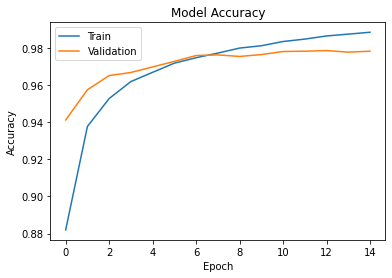

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

*   We can see from the above plot that the model has perfomed well on the train and validation data, with a **validation accuracy of 97%.**


### **Evaluating the model on the test data**

In [ ]:
accuracy = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.0775 - accuracy: 0.9762 - 549ms/epoch - 2ms/step


### **Generating the Predictions using the test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=ann_model.predict(X_test_normalized)

### **Plotting the Confusion Matrix**

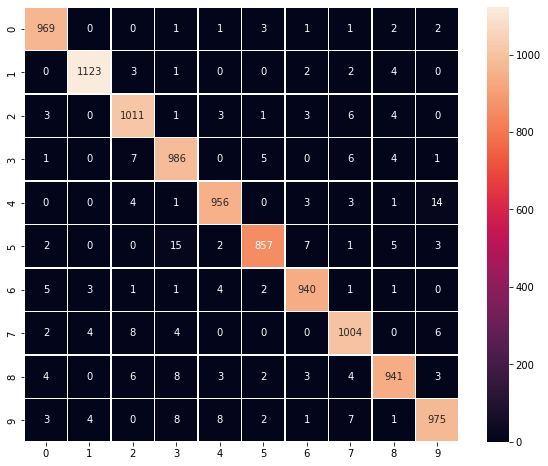

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**We observe that most of the classes are predicted correctly**, and the misclassification occurs mostly with the digit 4 which is sometimes confused with digit 9, and digit 5 which is sometimes confused with digit 3.

## **Model Building - Convolutional Neural Network (CNN)**

Let's create a CNN model sequentially, where we will be adding the layers one after another.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model = Sequential()
#The input shape to the conv2D will be (28,28,1), number of filters = 64, kernel size = (3,3), ,  activation function 'relu', and padding='same'
# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

#model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
#model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
#model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               1254500   
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

### <b> Fitting the model on the train data

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=5,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/5
844/844 - 16s - loss: 0.4269 - accuracy: 0.8522 - val_loss: 0.3035 - val_accuracy: 0.8907 - 16s/epoch - 18ms/step
Epoch 2/5
844/844 - 6s - loss: 0.2838 - accuracy: 0.8944 - val_loss: 0.3045 - val_accuracy: 0.8888 - 6s/epoch - 7ms/step
Epoch 3/5
844/844 - 6s - loss: 0.2419 - accuracy: 0.9101 - val_loss: 0.3293 - val_accuracy: 0.8883 - 6s/epoch - 7ms/step
Epoch 4/5
844/844 - 6s - loss: 0.2160 - accuracy: 0.9182 - val_loss: 0.2987 - val_accuracy: 0.8988 - 6s/epoch - 7ms/step
Epoch 5/5
844/844 - 6s - loss: 0.1955 - accuracy: 0.9286 - val_loss: 0.3454 - val_accuracy: 0.8972 - 6s/epoch - 7ms/step


### **Model Evaluation**

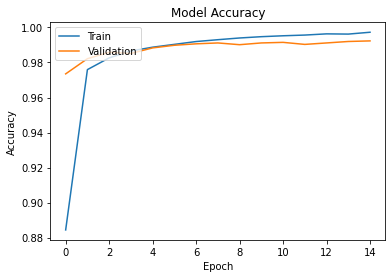

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the model has perfomed well on train and validation data with a validation accuracy of 98%.**






### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.3634 - accuracy: 0.8886 - 1s/epoch - 3ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

In [ ]:
y_pred

array([[1.90462770e-16, 3.84880306e-13, 2.35582359e-10, ...,
        1.00000000e+00, 5.84065216e-16, 1.56107267e-12],
       [3.40661483e-12, 9.61562913e-11, 1.00000000e+00, ...,
        2.93468826e-11, 4.27324522e-15, 2.79819875e-16],
       [3.45358018e-08, 9.99987841e-01, 1.15408774e-07, ...,
        7.84916210e-06, 2.63238394e-06, 5.44855311e-07],
       ...,
       [4.87154747e-16, 1.78744844e-12, 4.15244747e-16, ...,
        7.62496385e-11, 8.90395049e-11, 9.03232350e-11],
       [3.91514876e-10, 4.62680332e-18, 5.66047766e-16, ...,
        3.22405304e-14, 2.09865718e-07, 5.64922322e-14],
       [9.28946481e-13, 2.51747492e-14, 1.55210789e-10, ...,
        7.20291145e-19, 5.13860308e-12, 4.67404824e-17]], dtype=float32)

### **Plotting the Confusion Matrix**

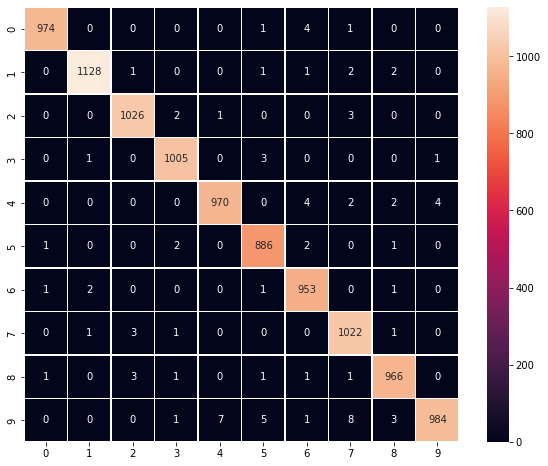

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

We observe that most of the classes are predicted correctly. 

The misclassification mostly with the the digits 4 and 8, which are confused with digit 9.